## Definindo o problema de negócio 

Nosso objetivo é o de prever o valor mediano das casas em diferentes blocos (áreas geográficas) com base nas variáveis entrada.
Essas variáveis incluem fatores como renda mediana, idade das casas, número médio de cômodos e quartos por moradia, população, 
ocupação média, latitude e longitude.

## Definindo o Dataset
Usaremos o conjunto de dados de habitação de califórnia do Scikit-learn que é um conjunto de dados comumente utilizado para tarefas de regressão.  Ele fornece informações sobre os preços das habitações em várias localidades na Califórnia. 

In [1]:
#Carregando o Dataset California Housing 
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [2]:
#Convertendo o conjunto de dados para o formato de dataFrame
data = fetch_california_housing(as_frame=True)
#data.DESCR

In [3]:
df = pd.concat([data.data, data.target], axis=1)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. MedInc: Renda Média no quarteirão ( medido em dezenas de milhares de dólares americanos )
2. HouseAge: Idade mediana das casas do quarteirão
3. AveRooms: Número médio de divisões por habitação 
4. AveBedrms: Número médio de quartos por habitação
5. Population: População no quarteirão
6. AveOccup: Número médio de ocupantes por habitação
7. Latitude: Latitude da localização do quarteirão
8. Longitude: Longitude da localização do quarteirão
9. MedHouseVal ( TARGET ): Valor médio da casa no quarteirão ( Expresso em centenas de milhares de dólares)

Observação: Um valor expresso em "centenas de milhares de dólares" é uma maneira de representar uma quantia em dólares usando a escala de centenas de milhares. Nessa escala, cada unidade representa uma quantidade de 100.000.

Por exemplo, se um valor é expresso como "3 centenas de milhares de dólares", significa que o valor é igual a 3 vezes 100.000, ou seja, 300.000 dólares.

Essa forma de expressão é comumente utilizada para simplificar números grandes e facilitar a compreensão. É especialmente útil quando se trata de quantias financeiras significativas, como valores de propriedades, investimentos, salários ou custos de projetos

## Análise Exploratória 

In [5]:
# Importando as bibliotecas 

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Calculano a média da variável target 
valor_medio_esperado_na_previsao = df['MedHouseVal'].mean()

In [7]:
#Este valor representa a média dos valores esperado na previsão dos dados, ou seja
#uma previsão efetuada não deve estar muito distante deste valor. 

In [8]:
#Calculando o SSE (Sum of Squared Errors)
#o SSE também conhecido como Soma dos Quadros dos Erros, é uma medida estatística amplamente utilizado para avaliar o desempenho
# de modelos de regressão. 
#Calculado da seguinte maneira:
#1 - Para cada observação no conjunto de dados, calcule a diferença entre o valor observado e o valor previsto pelo modelo. 
#2 - Ele essa diferenç ao quadrado para obter o quadrado do erro. 
#3 - Some todos os quadrados dos erros para obter o SSE

# Quanto menor o valor do SSE, melhor o ajuste do modelo aos dados. 

squared_errors = pd.Series(valor_medio_esperado_na_previsao - df['MedHouseVal'])**2
SSE = np.sum(squared_errors)
print('Soma dos quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos quadrados dos Erros (SSE): 27483


Text(0.5, 1.0, 'Histograma dos Erros')

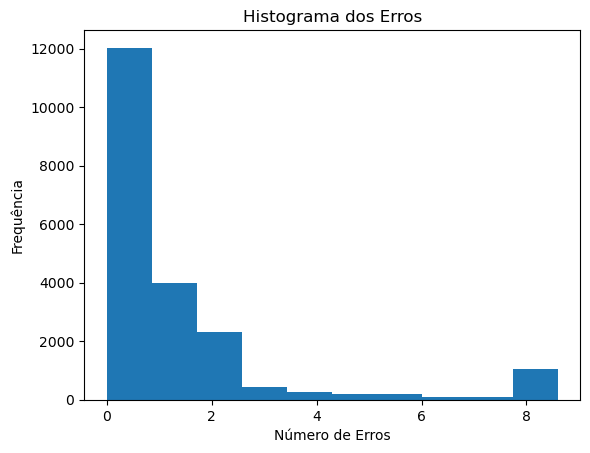

In [9]:
# Histograma dos Erros
# Conclusão: Temos mais erros "pequenos", ou seja, mais valores próximos à média. 
hist_plot = squared_errors.plot(kind='hist')
plt.xlabel('Número de Erros')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros')

Para regressão Linear Simples, iremos utilizar a variável MedInc - Renda Média no quarteirão pela forte relação existente entre elas duas. 
Vamos comprovar a relação existente entre elas com um conjunto de técnicas.

In [10]:
#Cálculo da Correlação entre as variáveis. Quanto mais próximo de 1 maior é a correlação entre as variáveis.
df.corr() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


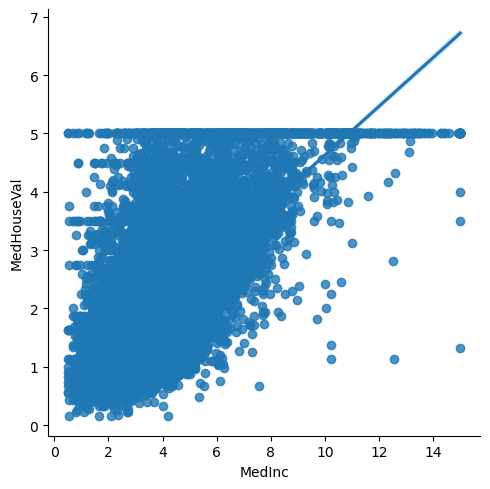

In [11]:
sns.lmplot(x='MedInc', y='MedHouseVal', data=df)

In [12]:
# Definindo o range dos valores de x e y
x_range = [df['MedInc'].min(),df['MedInc'].max()]
y_range = [df['MedHouseVal'].min(),df['MedHouseVal'].max()]

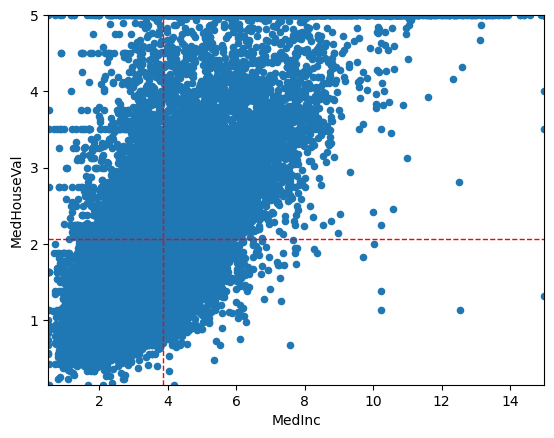

In [13]:
# Plot dos valores de x e y com a média
scatter_plot = df.plot(kind = 'scatter', x = 'MedInc', y = 'MedHouseVal', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [df['MedHouseVal'].mean(),df['MedHouseVal'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df['MedInc'].mean(), df['MedInc'].mean()], y_range, '--', color = 'red', linewidth = 1)

In [14]:
#Calculando o desvio padrão da Variável MedInc

# Um desvio padrão maior indica que os dados têm uma dispersão maior em relação á média. Isso pode indicar uma maior 
#variabilidade nos dados e sugerir que o modelo pode ter dificuldade em ajustar-se adequadmanete aos padrões existentes.
#Logo, quanto menor for o desvio padrão melhor.
print('Resultado do desvio padrão da variável MedInc:', np.std(df['MedInc']))

Resultado do desvio padrão da variável MedInc: 1.899775694574878


## Regressão Linear com o StatsModels

In [15]:
# Importando as funções
import statsmodels.api as sm

In [16]:
# Gerando X e Y
X = df['MedInc']
Y = df['MedHouseVal']

In [17]:
# Esse comando adiciona os valores dos coeficientes à variável X conforme obriga o StatsModels
X = sm.add_constant(X)

In [18]:
X.head()

,const,MedInc
0,1.0,8.3252
1,1.0,8.3014
2,1.0,7.2574
3,1.0,5.6431
4,1.0,3.8462


In [19]:
#Criando o modelo de regressão 
#Usamos a função OLS - Ordinary List Squared, que é uma forma de treinar o modelo de regressão
modelo = sm.OLS(Y,X)

#Treinando o Modelo 
modelo_v1= modelo.fit()

In [20]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:31:49   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p> É possível verificar a partir do sumário apresentado acima que o R-Squared está um pouco em baixo, lembrando que o mesmo   varia de <b> 0 á 1 </b> , ou seja, quanto maior ele for melhor! O que nos da a entender que apenas uma variável não é suficiente para o nosso modelo. Se calhar seria melhor construirmos um modelo de regressão multípla. 

In [21]:
print(modelo_v1.params)

const     0.450856
MedInc    0.417938
dtype: float64


In [22]:
#Gerando os valores previstos pelo modelo
valores_previstos = modelo_v1.predict(X)
valores_previstos

0        3.930277
1        3.920330
2        3.484003
3        2.809324
4        2.058331
           ...   
20635    1.102965
20636    1.519441
20637    1.161351
20638    1.231231
20639    1.449144
Length: 20640, dtype: float64

In [23]:
#Fazendo previsões com o modelo treinado
MedInc = 7
#Sabendo que o StatsModels requer uma matriz, logo criamos uma matriz com base a variável preditora (MedInc):
Xp = np.array([1,MedInc])
print("Se MedInc = %01.f nosso modelo prevê que o valor médio da casa no quarteirão é %01.f"%(MedInc, modelo_v1.predict(Xp)))

Se MedInc = 7 nosso modelo prevê que o valor médio da casa no quarteirão é 3


## Gerando um ScatterPlot com a Linha de Regressão 

In [24]:
#Range de valores de X e Y
x_range = [df['MedInc'].min(),df['MedInc'].max()]
y_range = [df['MedHouseVal'].min(), df['MedHouseVal'].max()]

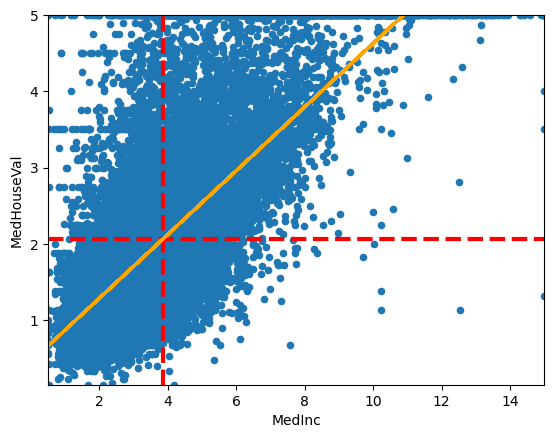

In [25]:
#Primeira camada do Scatter Plot
#Definimos o tipo de gráfico, as variáveis e o límite mínimo e máximo

scatter_plot = df.plot(kind = 'scatter', x = 'MedInc', y='MedHouseVal' , xlim = x_range, ylim = y_range)

#Segunda camada do Scatter Plot
#Calculamos as médias para definir os pontos de dados 

meanY = scatter_plot.plot(x_range, [df['MedHouseVal'].mean(),df['MedHouseVal'].mean()], '--', color='red', linewidth=3)
meanX = scatter_plot.plot([df['MedInc'].mean(),df['MedInc'].mean()],y_range, '--', color='red', linewidth=3)

#Terceira Camada do Scatter Plot  ( linha de regressão)
#Para construir a linha de regressão usamos os valores previstos pois são eles que representam o modelo em si, ou seja
# as previsões feitas pelo modelo
scatter_plot = scatter_plot.plot(df['MedInc'],valores_previstos, '-', color='orange', linewidth=2)

Interpretações feitas ao gráfico:

1 - MedInc que é a variável explanatória se encontra no eixo x, e a variável target sobre o eixo Y

2 - Cada pontinho azul é uma combinação entre ambas as variáveis, ou seja são observações

3 - A linha amarela representa o conjunto de previsões feitas pelo modelo

4 - Todos os pontos distantes da linha amarela(linha de regressão) representam a taxa de erro.

5-  Existe uma diferença entre o valor observado Azul e o valor previsto que está na linha amarela. Essa é a diferença
que chamamos de resíduo.
  
Obs: Mas ter pontos distantes da reta não é grave pois demonstra que o modelo é capaz de generalizar bem os dados. Uma curva que tocasse em todos os pontos seria um OverFitting - Uma decoração, e não uma aprendizagem. 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
#Gerando os resíduos
residuos = df['MedHouseVal'] - valores_previstos

#Normalizamos os residuos para colocar tudo na mesma escala e podermos desenhar o gráfico
#Antes de normalizar, convertemos os residuos para uma variável 2D visto que o StandardScaler somente recebe variáveis 2D

#Conversão dos residuos para o tipo de array numpy
dados = np.array(residuos)

#Conversão do array 1D para 2D
dados_2d= dados.reshape(-1,1)

#Aplicamos o método sobre os dados 2D

residuos_normalizados = scaler.fit_transform(dados_2d)

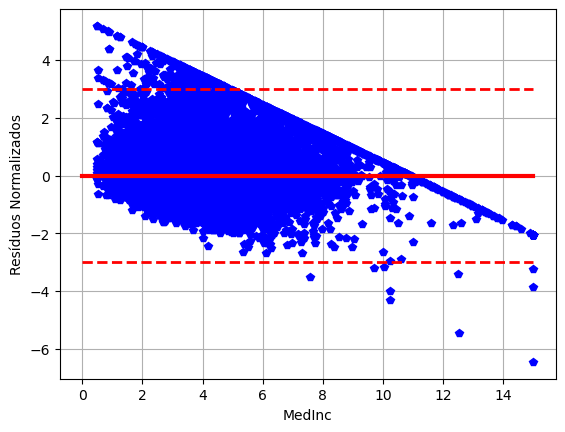

In [28]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(df['MedInc'], residuos_normalizados,'bp')
plt.xlabel('MedInc') 
plt.ylabel('Resíduos Normalizados') 
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

## Regressão Linear com Scikit-Learn

In [29]:
from sklearn import linear_model

In [30]:
# Criar o objeto da linearModel APENAS
#Chamamos a função Linear Regression que é a função de regressão Linear
modelo_v2 = linear_model.LinearRegression()

In [31]:
#Definindo os valores de X e Y
num_observ = len(df)

#Mudamos o formato de X para un formato de matriz pois é assim que o scikitLearn espera receber os dados 
X = df['MedInc'].values.reshape((num_observ,1)) # X deve sempre ser uma matriz e nunca um vetor
Y = df['MedHouseVal'].values # y pode ser um vector. 

In [32]:
# Treinamento do Modelo com o método fit() , visto que o modelo_v2 é um objecto.  
modelo_v2.fit(X, Y)

LinearRegression()

In [33]:
#Imprimindo os Coeficientes

print(modelo_v2.coef_)
print(modelo_v2.intercept_)

[0.41793849]
0.45085576703267916


In [34]:
#Imprimir os modelos treinados

print(modelo_v2.predict(X))

[3.9302773  3.92033036 3.48400258 ... 1.1613512  1.23123052 1.44914365]


In [35]:
#Fazendo previsões com o modelo treinado
#É importante lembrar que o SciKit learn espera receber os valores de entrada em formato de Matriz
#Logo criamos uma matriz antes de inserir no modelo para fazer a previsão

MedInc=4
#Xp = np.array(MedInc)
Xp = np.array(MedInc).reshape(-1,1)
print(modelo_v2.predict(Xp))

[2.12260974]


## Comparação do Scikit com o StatsModels

In [36]:
#Vamos importar a função MakeRegression que basicamente nos permite criar uma amostra de dados de 10 milhões de registos
# A seguir iremos efetuar o treinamento do modelo com as diferentes bibliotecas e medir o tempo 

from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples = 10000000, n_features = 1, n_targets = 1, random_state = 101)


In [37]:
%%time 
sk_linear_regression = linear_model.LinearRegression()
sk_linear_regression.fit(HX,Hy)



CPU times: total: 750 ms
Wall time: 725 ms


LinearRegression()

In [38]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()


CPU times: total: 1.95 s
Wall time: 1.66 s


Comparando os Wall time de cada um, é possível verificar que scikitlearn é bem mais veloz que o StatsModels.
Logo podemos concluir que o StatsModels é bem mais útil de ser utilizado quando pretendemos explorar a interpretabilidade do Modelo
e o SciKitLearn é bem mais útil quando pretendemos optar pela velocidade do mesmo. 